# Exercise:
Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

In [12]:
#imports:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

#visualizations: 
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [13]:
# functions to create clusters and scatter-plot:


def create_cluster(df, X, k):
    
    """ Takes in df, X (dataframe with variables you want to cluster on) and k
    # It scales the X, calcuates the clusters and return dataframe (with clusters), the Scaled dataframe,
    #the scaler and kmeans object and unscaled centroids as a dataframe"""
    
    scaler = StandardScaler(copy=True).fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    kmeans.predict(X_scaled)
    df['cluster'] = kmeans.predict(X_scaled)
    df['cluster'] = 'cluster_' + df.cluster.astype(str)
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    return df, X_scaled, scaler, kmeans, centroids


def create_scatter_plot(x,y,df,kmeans, X_scaled, scaler):
    
    """ Takes in x and y (variable names as strings, along with returned objects from previous
    function create_cluster and creates a plot"""
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x = x, y = y, data = df, hue = 'cluster')
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')

### Question 1:
Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.

In [14]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [15]:
new_col_names = []

for col in iris.columns:
    new_col_names.append(col.lower().replace('.', '_'))

iris.columns = new_col_names

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


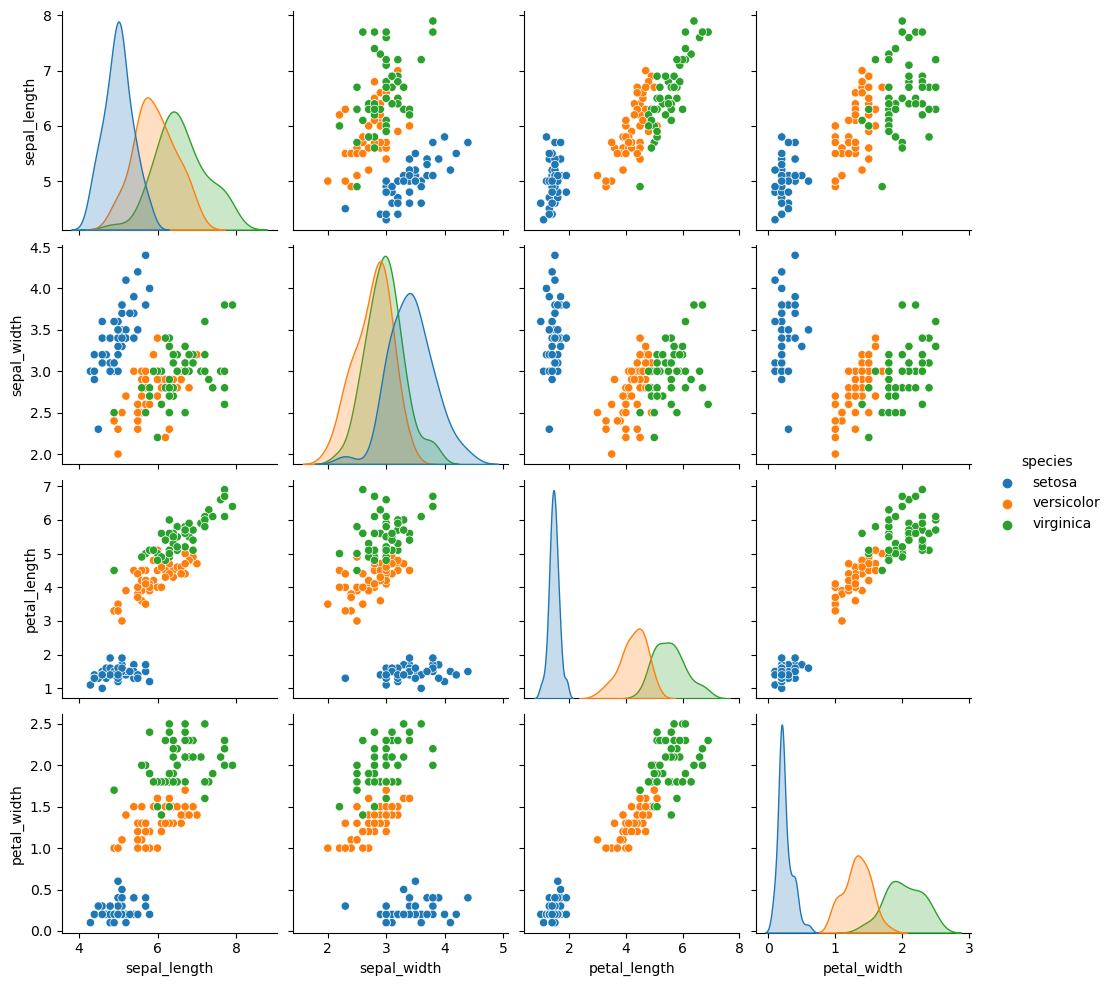

In [16]:
sns.pairplot(iris, hue = 'species')

In [17]:
# choose some features: 
X = iris[['petal_length','petal_width']]
X.head()

,petal_length,petal_width
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2


In [18]:
iris, X_scaled, scaler, kmeans, centroids = create_cluster(iris, X, 3)

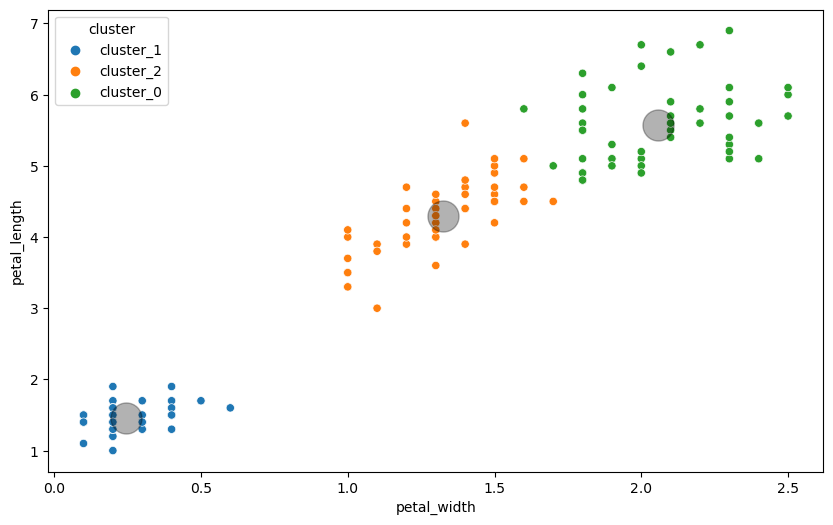

In [21]:
create_scatter_plot('petal_width', 'petal_length',iris,kmeans, X_scaled, scaler)

Text(0.5, 1.0, 'Actual Species')

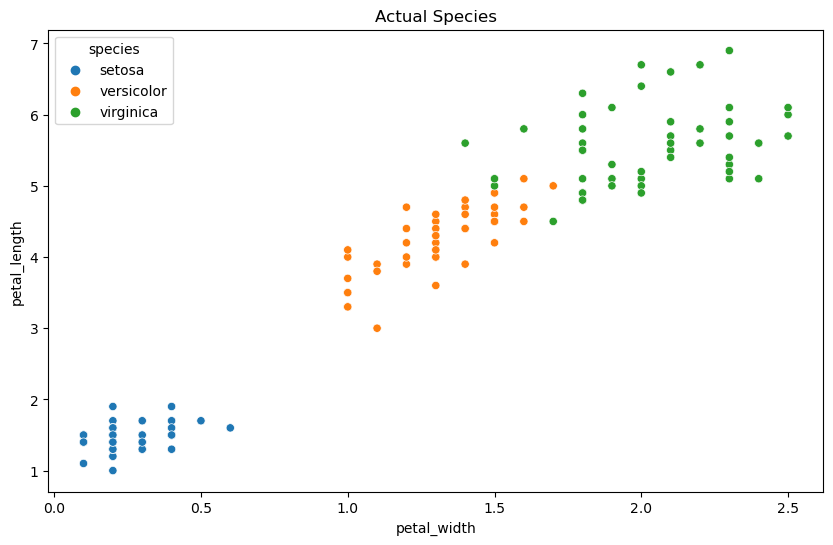

In [22]:
# plot actual species

plt.figure(figsize = (10,6))
sns.scatterplot(x = 'petal_width', y = 'petal_length', data = iris, hue = 'species')
plt.title('Actual Species')

### Question 2: 
Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [26]:
# imports
import wrangle_mall as wr

In [30]:
df = wr.acquire_mall()
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
X = df[['annual_income', 'spending_score']]

In [32]:
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,annual_income,spending_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


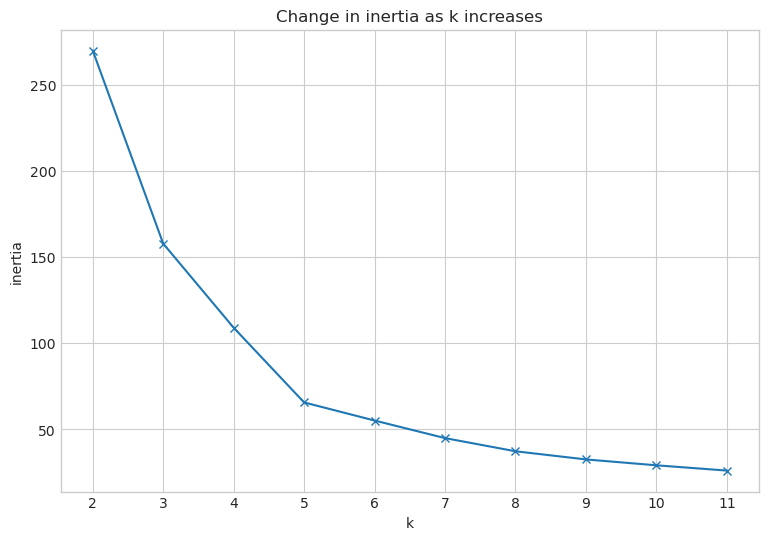

In [33]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [34]:
df, X_scaled, scaler, kmeans, centroids = create_cluster(df, X, 5)

<Figure size 1400x900 with 0 Axes>

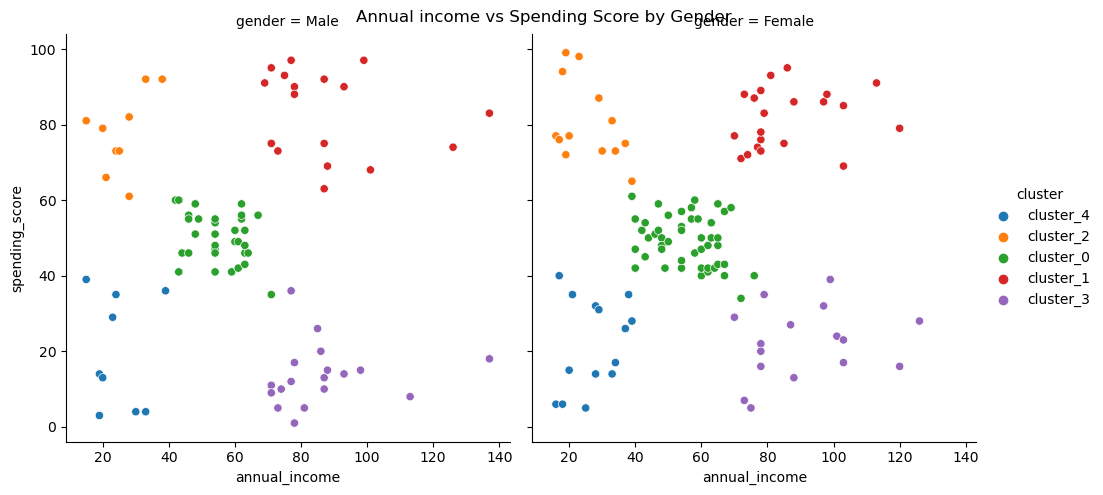

In [36]:
plt.figure(figsize=(14, 9))
sns.relplot(x = 'annual_income', y = 'spending_score', data = df, hue = 'cluster', col = 'gender')
plt.suptitle('Annual income vs Spending Score by Gender');

### Question 3: 
How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

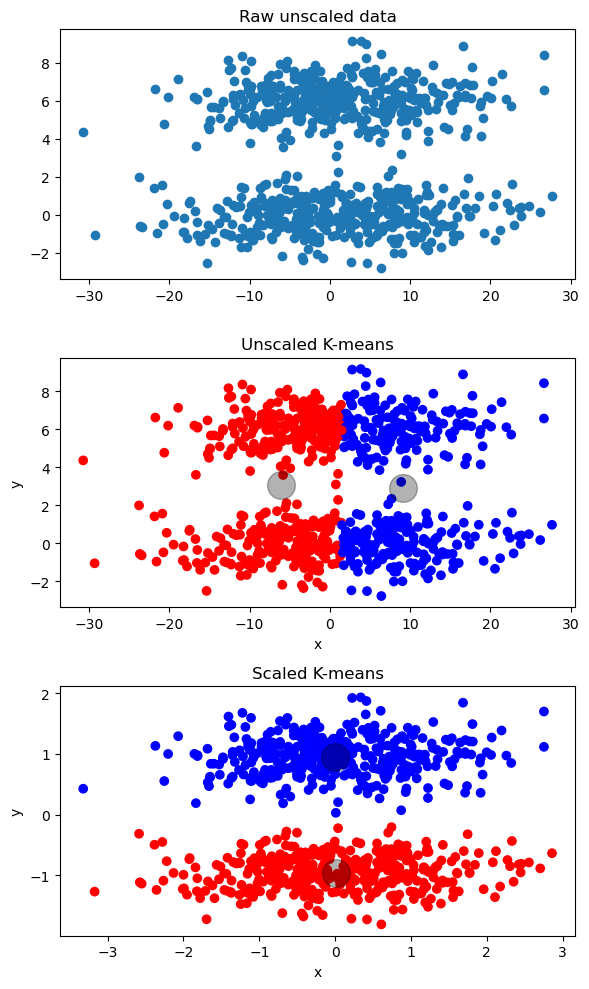

In [37]:
import random

# create data
rnorm = np.random.randn
x1 = rnorm(800) * 10  
y1 = np.concatenate([rnorm(400), rnorm(400) + 6])
df = pd.DataFrame()
df['x'] = x1
df['y'] = y1

# scale the data
scaler = StandardScaler()
cols = ['x', 'y']
df_scaled = df.copy()
df_scaled[cols] = scaler.fit_transform(df[cols])

X = df[cols]
X_scaled = df_scaled[cols]


# create subplots
fig, axes = plt.subplots(3, 1, figsize=(6,10))

#plot on first axes
axes[0].scatter(x1, y1)
axes[0].set_title('Raw unscaled data')


# Implement Kmeans on unscaled data and plot on 2nd axes
km = KMeans(2, random_state = 123)

clusters = km.fit_predict(X)
centroids = pd.DataFrame(km.cluster_centers_, columns = ['x', 'y'])

axes[1].scatter(df.x, df.y, c=clusters, cmap='bwr')
centroids.plot.scatter(x='x', y= 'y', ax=axes[1], marker='o', alpha = 0.3, s=400, c='k')
axes[1].set_title('Unscaled K-means')


# Implement Kmeans on scaled data and plot on 3rd axes

clusters = km.fit_predict(X_scaled)
centroids = pd.DataFrame(km.cluster_centers_, columns = ['x', 'y'])

axes[2].scatter(df_scaled.x, df_scaled.y, c=clusters, cmap='bwr')
centroids.plot.scatter(x= 'x', y= 'y', ax=axes[2], marker='o', alpha = 0.3, s=400, c='k')
axes[2].set_title('Scaled K-means')
# axes[2].set_xlim(-30,30)
# axes[2].set_ylim(-4,6)

plt.tight_layout()
